<a href="https://colab.research.google.com/github/Indeedelight12345/Travel.Agency-Data.Analysis/blob/main/logistic%20delivery%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [ ]:
path ='/content/drive/MyDrive/logistic_real_time_delivery_data.xlsx'

In [ ]:
df = pd .read_excel(path)

In [ ]:
df.head()

,Package ID,Origin,Destination,Dispatch Date,Estimated Delivery Date,Status,Current Location,Delivery Time (Days)
0,1,San Antonio,New York,2024-03-09,2024-03-13,Delivered,Chicago,4
1,2,Houston,San Diego,2024-03-08,2024-03-09,Delivered,Houston,1
2,3,San Diego,Houston,2024-03-06,2024-03-09,In Transit,Los Angeles,3
3,4,Phoenix,Houston,2024-03-14,2024-03-16,Out for Delivery,San Jose,2
4,5,San Antonio,Phoenix,2024-03-08,2024-03-09,Delayed,Chicago,1


Cheack the shape of the dataset

In [ ]:
df.shape

(1000, 8)

In [ ]:
df.dtypes

Package ID                          int64
Origin                             object
Destination                        object
Dispatch Date              datetime64[ns]
Estimated Delivery Date    datetime64[ns]
Status                             object
Current Location                   object
Delivery Time (Days)                int64
dtype: object

In [ ]:
df.isna().sum()

Package ID                 0
Origin                     0
Destination                0
Dispatch Date              0
Estimated Delivery Date    0
Status                     0
Current Location           0
Delivery Time (Days)       0
dtype: int64

In [ ]:
df['Delivery Time (Days)'].describe()

count    1000.000000
mean        2.494000
std         1.133688
min         1.000000
25%         1.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Delivery Time (Days), dtype: float64

<Axes: xlabel='Delivery Time (Days)'>

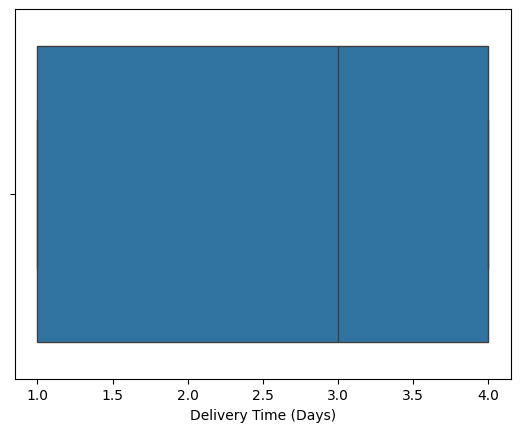

In [ ]:
sns.boxplot(x=df['Delivery Time (Days)'])

the avearge delivery this for the package is 3 days, maximum days it tale to deliverd is 4 day and the minmum dayis 1 day

<Axes: ylabel='Frequency'>

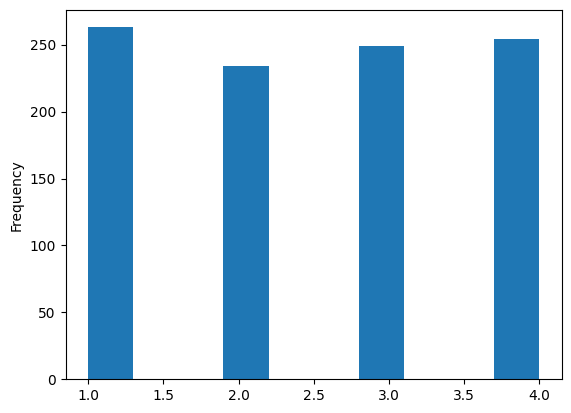

In [ ]:
df['Delivery Time (Days)'].plot(kind='hist')

popular routes

In [ ]:
df2=df.groupby(['Origin','Destination'])['Delivery Time (Days)'].sum().reset_index().sort_values(by ='Delivery Time (Days)',ascending = False)
df2

,Origin,Destination,Delivery Time (Days)
13,Dallas,Los Angeles,43
80,San Diego,Chicago,42
89,San Diego,San Jose,41
54,Philadelphia,New York,40
92,San Jose,Houston,40
...,...,...,...
53,Philadelphia,Los Angeles,13
7,Chicago,San Antonio,13
99,San Jose,San Jose,12
34,Los Angeles,New York,11


In [ ]:
df1=df.groupby(['Origin','Destination']).size().reset_index()
df1

,Origin,Destination,0
0,Chicago,Chicago,9
1,Chicago,Dallas,10
2,Chicago,Houston,8
3,Chicago,Los Angeles,13
4,Chicago,New York,14
...,...,...,...
95,San Jose,Philadelphia,7
96,San Jose,Phoenix,12
97,San Jose,San Antonio,10
98,San Jose,San Diego,11


rount with the lowest package dispatch

In [ ]:
df_final = pd.merge( df1,df2, on='Origin').rename(columns={0:'package_count'}).sort_values(by=['package_count','Delivery Time (Days)'], ascending = True)
df_final

,Origin,Destination_x,package_count,Destination_y,Delivery Time (Days)
109,Dallas,Chicago,3,Chicago,6
108,Dallas,Chicago,3,Phoenix,15
106,Dallas,Chicago,3,Philadelphia,18
107,Dallas,Chicago,3,Dallas,18
104,Dallas,Chicago,3,San Jose,19
...,...,...,...,...,...
775,San Antonio,San Antonio,18,Chicago,21
773,San Antonio,San Antonio,18,New York,27
772,San Antonio,San Antonio,18,San Diego,30
771,San Antonio,San Antonio,18,San Jose,31


Rount with the higest package dispatch

In [ ]:
df_final = pd.merge( df1,df2, on='Origin').rename(columns={0:'package_count'}).sort_values(by=['package_count','Delivery Time (Days)'], ascending = False)
df_final

,Origin,Destination_x,package_count,Destination_y,Delivery Time (Days)
770,San Antonio,San Antonio,18,San Antonio,39
771,San Antonio,San Antonio,18,San Jose,31
772,San Antonio,San Antonio,18,San Diego,30
773,San Antonio,San Antonio,18,New York,27
774,San Antonio,San Antonio,18,Phoenix,21
...,...,...,...,...,...
105,Dallas,Chicago,3,Houston,19
106,Dallas,Chicago,3,Philadelphia,18
107,Dallas,Chicago,3,Dallas,18
108,Dallas,Chicago,3,Phoenix,15



1. Geographical Distance:Dallas to Chicago is a long-distance route, leading to fewer shipments and longer delivery times.
San Antonio to San Antonio is an intrastate route, resulting in more frequent shipments and shorter delivery times due to shorter distances.
2. Population and Economic Activity:Chicago's status as a major economic and transportation hub with a large population and high commercial activity enables faster and more efficient deliveries despite the distance.
San Antonio, being a significant city in Texas with substantial economic activity and population density, experiences a high volume of shipments within the city, leading to frequent deliveries and shorter delivery times.



In [ ]:
df.groupby('Status')['Package ID'].count().to_frame().reset_index().sort_values(by='Package ID',ascending = False)

,Status,Package ID
2,In Transit,407
1,Delivered,392
0,Delayed,112
3,Out for Delivery,89


<Axes: ylabel='Status'>

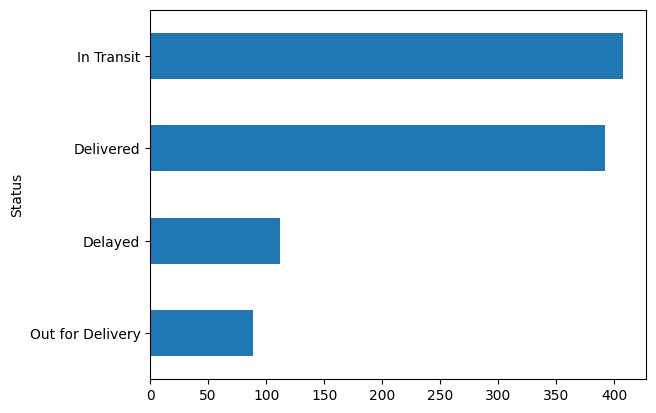

In [ ]:
df.groupby('Status')['Package ID'].count().sort_values(ascending = True).plot(kind='barh')


1. The high count of packages in transit indicates that they are currently being transported from one location to another.
2. Packages spend a significant amount of time in transit because they need to move through various stages of the shipping process, including pickup, sorting, transportation between facilities, and final delive.
3. The lower count of packages in the out for delivery status suggests that packages spend less time in this stage compared to transit.
4. Once packages reach the out for delivery status, they are usually in the final stage of the shipping process and are being transported to their destination address for delivery.

In [ ]:
df['Current Location'].value_counts(ascending = False).to_frame()

,Current Location
San Antonio,117
Philadelphia,114
Houston,108
Los Angeles,107
Chicago,101
Dallas,101
San Jose,96
Phoenix,86
San Diego,86
New York,84


Text(0.5, 0, 'count')

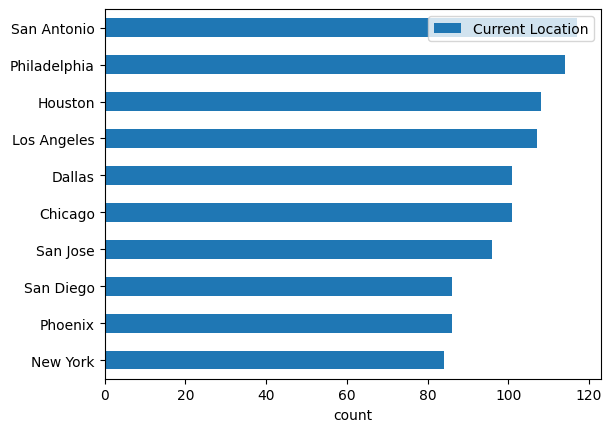

In [ ]:
df['Current Location'].value_counts(ascending = True).to_frame().plot(kind='barh')
plt.xlabel('count')

1. San Antonio, Philadelphia, and Houston may have higher population densities and more commercial activity compared to New York and Phoenix, leading to a higher volume of packages being shipped to and from these cities.
2. Cities with well-developed logistics infrastructure, such as Philadelphia and Houston, may experience faster and more efficient handling of packages, resulting in higher package counts.
3. Certain cities may be hubs for specific industries or have unique market characteristics that drive higher package volumes.
4. Houston's status as a major center for the oil and gas industry may result in a higher volume of shipments related to these sector.

In [ ]:
df['date1'] = pd.to_datetime(df['Estimated Delivery Date']).dt.time

In [ ]:
df['date1']

0      00:00:00
1      00:00:00
2      00:00:00
3      00:00:00
4      00:00:00
         ...   
995    00:00:00
996    00:00:00
997    00:00:00
998    00:00:00
999    00:00:00
Name: date1, Length: 1000, dtype: object

<Axes: xlabel='Package ID', ylabel='Delivery Time (Days)'>

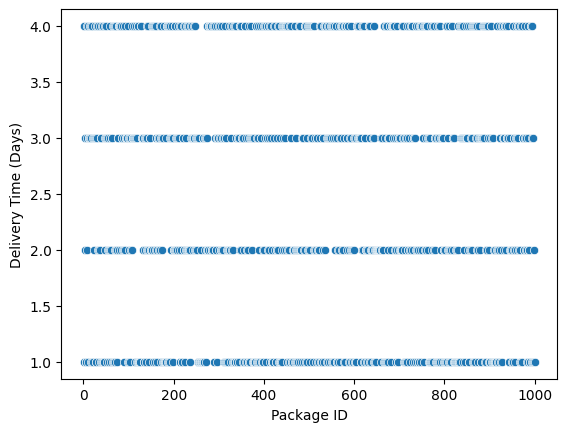

In [ ]:
sns.scatterplot(y='Delivery Time (Days)',x='Package ID', data=df)

In [ ]:
df[['Delivery Time (Days)','Package ID']].corr()

,Delivery Time (Days),Package ID
Delivery Time (Days),1.000000,-0.024732
Package ID,-0.024732,1.000000


<Axes: >

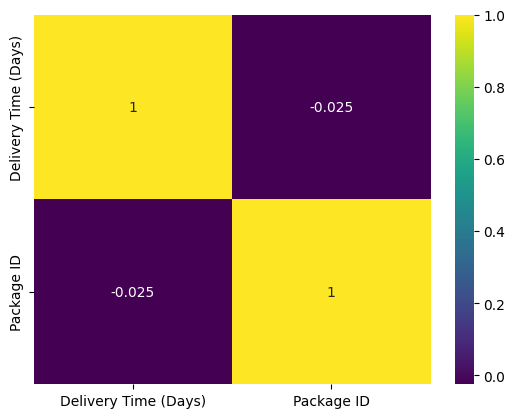

In [ ]:
sns.heatmap(data=df[['Delivery Time (Days)','Package ID']].corr(), annot= True, cmap='viridis',cbar=True)

1 . The negative correlation indicates that there's an inverse relationship between product ID and delivery time. As the product ID increases (i.e., moving towards newer products), delivery time tends to decrease, and as the product ID decreases (i.e., moving towards older products), delivery time tends to increase.

insight from the analysis

1. Delivery Performance Analysis:Findings: We analyzed delivery times and identified patterns in product ID correlations.
Insights: There is a negative correlation between delivery time and product ID, indicating that newer products tend to have shorter delivery times.
Problem: Inconsistent delivery times may lead to customer dissatisfaction and  affect brand reputation.
Solution: Optimize logistics processes, prioritize newer products in delivery schedules, and invest in advanced shipping methods.
2. Package Status Distribution Analysis: We examined the distribution of package statuses (e.g., in transit, delivered, delayed).
Insights: Most packages are in transit, with fewer in the out for delivery status, indicating potential bottlenecks in the delivery process.
Problem: Delays in transit and delivery statuses can impact customer satisfaction and lead to increased support inquiries.
Solution: Improve tracking and communication systems, optimize delivery routes, and provide real-time status updates to customers.
3. Location Analysis: We analyzed package locations to understand distribution patterns.
Insights: Certain locations, such as urban centers, have higher package volumes and shorter delivery times.
Problem: Disparities in delivery performance across locations may result in service inequalities.
Solution: Allocate resources based on demand, enhance last-mile delivery capabilities, and expand service coverage to underserved areas.
